# Pandas
Note: We will be using Stackoverflow 2019 Survey dataset in this tutorial.
https://insights.stackoverflow.com/survey

### Magic functions:
1. These magic commands are intended to solve common problems in data analysis using Python.
2. Magic commands act as convenient functions where Python syntax is not the most natural one. They are useful to embed invalid python syntax in their work flow.
3. There are two types of Magic commands:
    a. Line Magic: They are similar to command line calls. They start with % character. Rest of the line is its argument passed without parentheses or quotes. Line magics can be used as expression and their return value can be assigned to variable.
    b. Cell Magic: They have %% character prefix. Unlike line magic functions, they can operate on multiple lines below their call. They can in fact make arbitrary modifications to the input they receive, which need not even be a valid Python code at all.
4. Common magic function:
    * %MagicFunction? Use this to know more about.
    * %alias alias_name cmd --> use to create alias name for system commands
    * %run hello.py--> This command runs a Python script from within IPython shell.
    * %time expression --> This command displays time required by IPython environment to execute a Python expression.
    * %timeit --> 
    * %who --> This line magic prints all interactive variables, with some minimal formatting.
    * @register_line_magic -->  A user defined function is converted into a line magic function using this decorator.

In [1]:
%timeit sum(range(10))

724 ns ± 60.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [2]:
# Use %MagicFunction? to get a help doc on that magic function. See below example.
# %matplotlib?
# While using Jupyter notebook, %matplotlib inline directive displays plot output in the browser only.

In [3]:
# %timeit?

In [4]:
# Displays all magic functions currently available
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [3]:
import pandas as pd
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sbs

In [6]:
#set options for pd to display n columns, otherwise your columns will be trimmed
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

In [7]:
# Sample read with same column names
# use r'' for full path name
test = pd.read_table(r'.\data\test.tsv') # index_col= False is available
# Uncomment and see how we can use pd.read_csv and also set first column to be used as a data rather than columnn index
# test = pd.read_csv(r'D:\Veena\Data Science Project\Knowledge\data\test.tsv', sep='\t', index_col=False) # same as above
test

,test,test,test.1,test.2,test.3
veena1,veena2,veena3,veena4,veena5,veena6
kal,kal,kal,kal,kal,kal


In [8]:
# Reading data from HTML: 
# Here we will be reading the table that is available in the this website
url = "http://www.basketball-reference.com/leagues/NBA_2015_totals.html"
data = pd.read_html(url) # Docstring: Read HTML tables into a ``list`` of ``DataFrame`` objects.
print(type(data))
print(type(data[0])) # So items in list are dataframe objects

<class 'list'>
<class 'pandas.core.frame.DataFrame'>


In [9]:
print(len(data)) # so there is only one table which is the table in html web

1


In [10]:
data[0].head(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Quincy Acy,PF,24,NYK,68,22,1287,152,331,.459,18,60,.300,134,271,.494,.486,76,97,.784,79,222,301,68,27,22,60,147,398
1,2,Jordan Adams,SG,20,MEM,30,0,248,35,86,.407,10,25,.400,25,61,.410,.465,14,23,.609,9,19,28,16,16,7,14,24,94
2,3,Steven Adams,C,21,OKC,70,67,1771,217,399,.544,0,2,.000,217,397,.547,.544,103,205,.502,199,324,523,66,38,86,99,222,537
3,4,Jeff Adrien,PF,28,MIN,17,0,215,19,44,.432,0,0,NaN,19,44,.432,.432,22,38,.579,23,54,77,15,4,9,9,30,60
4,5,Arron Afflalo,SG,29,TOT,78,72,2502,375,884,.424,118,333,.354,257,551,.466,.491,167,198,.843,27,220,247,129,41,7,116,167,1035


In [11]:
data ={
    'col1':[1,2],
    'col2':[3,4],
}
da = pd.DataFrame(data=data, index = ['s1', 's2'])
print(da)
da.to_csv('data/output_sample.csv')
# by default the first column is read as a index column. But in this case (open the csv) we have a leading ','
# (pandas mark the name of that column as "Unnamed:0")
# it is considered as a data column. Remove it and run the code again.
res = pd.read_csv('data/output_sample.csv')
res

    col1  col2
s1     1     3
s2     2     4


,Unnamed: 0,col1,col2
0,s1,1,3
1,s2,2,4


In [12]:
# store the data with index_label as 'I' and see and read the index as 'I' and see the result.
da.to_csv('data/output_sample.csv',  index_label='I')
res = pd.read_csv('data/output_sample.csv', index_col = 'I')
res

,col1,col2
I,,
s1,1,3
s2,2,4


In [13]:
res = pd.read_csv('data/output_sample.csv', index_col=[0])
# res = pd.read_csv('data/output_sample.csv', index_col='I')
res

,col1,col2
I,,
s1,1,3
s2,2,4


In [14]:
# lets use the Titanic dataset where ever applicable 
# use r'D:\Veena\Data Science Project\Knowledge\data\titanic_kaggle_dataset.csv' for full path name
tnic_df = pd.read_csv('data/titanic_kaggle_dataset.csv', header=0, dtype={'Age':np.float64})
tnic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Random number generation
* For single values and list of random numbers we can use python random package
* For array or multidimensional random number we use numpy random numbers
* https://docs.python.org/3/library/random.html
* https://numpy.org/doc/1.18/reference/random/generator.html

#### Using Python Random Package

In [15]:
# using python random package
random.random() # this generates single random float between 0-1, Cannot generate more than one
random.randint(1,5) # this generates one random int between range of numbers. Range is required.
random.sample(range(10,30), 5) #5 elements list of random ints between the range without replacement(no repeatation)
random.sample([1,2,3,4,5,6,4,7,8,9],5)
random.randrange(10) # Integer from 0 to 9 inclusive
random.randrange(10, 20) # single integer from 10 to 19 inclusive
random.randrange(0,101,2) # integer from 0 to 100 inclusive in steps of 2(Even)
random.choice(['win', 'lose', 'draw']) # Single random element from a sequence


'draw'

In [16]:
random.sample([10, 20, 30, 40, 50], k=4) # without replacement
# below choices produces a list of 4 numbers from the 1st sequence, with a weights of 2nd sequence
# so occurance of 10 is highest than anyother. There can be repeats hence called as with replacement.
random.choices([10, 20, 30, 40, 50], [50, 10, 10, 10, 10], k=4) 


[50, 10, 40, 30]

#### Using Numpy Random function
1. np.random.rand generates numbers uniformly distribution over \[0,1)
2. np.radnom.randn generates numbers following standard normal distribtion.

In [17]:
# np.random.seed sets the seed for the generator.
# np.random.seed(1)

In [18]:

np.random.random(2) # generate array of 2 random floats between 0-1, it takes only one argument
np.random.rand(2,3) # matrix of (2,3) with random float between 0-1
np.random.randn(2, 3) # Generate 2 * 3 random numbers with normal distribution
np.random.randint(4, size=1) # single random interger between 0-4.
np.random.randint(2,4, size=(2,3)) # matrix of size (2,3) random interger between 2-4.


array([[3, 2, 2],
       [2, 3, 2]])

In [19]:
# Some aliases:All these are same functions
# vranf = random = sample = random_sample
# __all__.extend(['ranf','random','sample'])

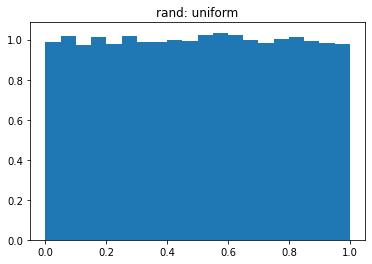

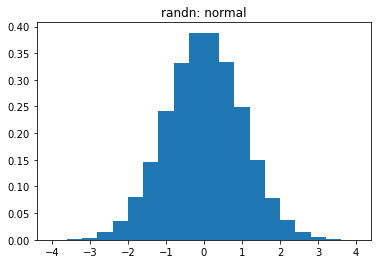

In [20]:
sample_size = 100000
uniform = np.random.rand(sample_size)
normal = np.random.randn(sample_size)

pdf, bins, patches = plt.hist(uniform, bins=20, range=(0, 1), density=True)
plt.title('rand: uniform')
plt.show()

pdf, bins, patches = plt.hist(normal, bins=20, range=(-4, 4), density=True)
plt.title('randn: normal')
plt.show()

In [29]:
# Draw random samples from a normal (Gaussian) distribution.
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
nor = np.random.normal(loc=0.0, scale=1.0, size=1000) # loc=Mean scale=Std 
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html
uni = np.random.uniform(low=0.0, high=1.0, size=1000)

                 0
count  1000.000000
mean     -0.030001
std       0.994528
min      -3.403939
25%      -0.699526
50%      -0.048287
75%       0.655313
max       3.440403


<AxesSubplot:ylabel='Frequency'>

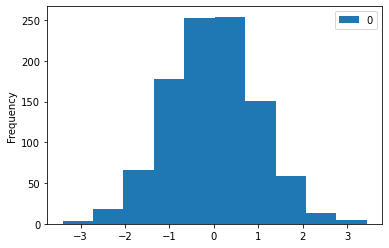

In [30]:
nor_pd = pd.DataFrame(nor)
print(nor_pd.describe())
nor_pd.plot(kind="hist")

                 0
count  1000.000000
mean      0.486850
std       0.290343
min       0.000370
25%       0.226238
50%       0.496042
75%       0.731939
max       0.999490


<AxesSubplot:ylabel='Frequency'>

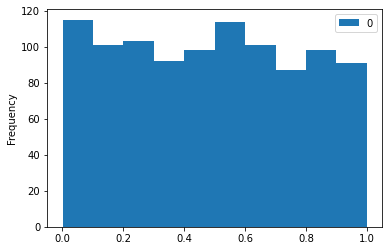

In [31]:
uni_pd = pd.DataFrame(uni)
print(uni_pd.describe())
uni_pd.plot(kind="hist")

## Dataframe:

1. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
2. https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
2. A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns. Dataframe can be imagined as a 2D table.
4. __Axis=0__ is works down the rows and __Axis=1__ works itself alone the columns.  
<img src='images/image38.png' align='middle' style='width:150px; height:150px'/>
3. Parameters:
    * data  : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
   

In [21]:
#os.getcwd() 
# its easier to replace all costum missing values while reading a csv file like this
na_vals = ['NA', 'Missing'] # read_csv will treat 'NA' and 'Missing' as NaN's and replace it with NaN
df = pd.read_csv(r'.\data\StackOverFlow 2019 Survey\survey_results_public.csv', index_col='Respondent', na_values=na_vals)

In [22]:
# setting the index_col to 'Column' makes it easy to read the schema text. It will be enough to know the name of the column
# its integer index in schema_df table is not required to be known.
# try deleting the index_col and read the schema text for one of the column
schema_df = pd.read_csv('data/StackOverFlow 2019 Survey/survey_results_schema.csv', index_col='Column')
schema_df.head(2)

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...


In [23]:
schema_df.loc['MgrIdiot']
# schema_df.loc['MgrIdiot', 'QuestionText']

QuestionText    How confident are you that your manager knows ...
Name: MgrIdiot, dtype: object

In [24]:
#df.head(2) # displays only first n rows
#df.tail(1) # displays only bottom n rows
#df.shape # returns tuple of (rows, cols) of the df
df.info() # gives info about rows, cols and col's datatype with if any NaN
#df.describe() #gives statistical analysis of each column
#df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88883 entries, 1 to 88863
Data columns (total 84 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              88331 non-null  object 
 1   Hobbyist                88883 non-null  object 
 2   OpenSourcer             88883 non-null  object 
 3   OpenSource              86842 non-null  object 
 4   Employment              87181 non-null  object 
 5   Country                 88751 non-null  object 
 6   Student                 87014 non-null  object 
 7   EdLevel                 86390 non-null  object 
 8   UndergradMajor          75614 non-null  object 
 9   EduOther                84260 non-null  object 
 10  OrgSize                 71791 non-null  object 
 11  DevType                 81335 non-null  object 
 12  YearsCode               87938 non-null  object 
 13  Age1stCode              87634 non-null  object 
 14  YearsCodePro            74331 non-null

In [25]:
# to find which columns belong to a particula type
df.select_dtypes(include = [np.number]).columns # np.number is for type float objects

Index(['CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs', 'Age'], dtype='object')

### wherever applicablel we will use the Titanic dataset to understnd the concepts more

In [26]:
tnic_df = pd.read_csv('data/titanic_kaggle_dataset.csv', header=0, dtype={'Age':np.float64})
tnic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
tnic_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [28]:
# python dictionary to Dataframe
people = {
    "first": ["Corey", 'Jane', 'John'], 
    "last": ["Schafer", 'Doe', 'Doe'], 
    "email": ["CoreyMSchafer@gmail.com", 'JaneDoe@email.com', 'JohnDoe@email.com']
}
df1 = pd.DataFrame(people, index=list('ABC'))
# df1 = pd.DataFrame(people, columns=['first', 'last']) # this will create a df with only 2 columns
df1

,first,last,email
A,Corey,Schafer,CoreyMSchafer@gmail.com
B,Jane,Doe,JaneDoe@email.com
C,John,Doe,JohnDoe@email.com


#### __Pandas support duplicate indexes.__

In [29]:
# python list to Dataframe
# col names are autogenerated as intergers, so are the indexes
people = ['Veena', 32, 'veena@email.com', 'chicago']
col_names = ['Name', 'age', 'email', 'city']
#df2 = pd.DataFrame(data=[people]) #this will create a (1,4) df
#df2 = pd.DataFrame(data=people) # this will create a (4,1) df
df2 = pd.DataFrame(data=[people], columns=col_names)
# df2.ndim # 2 in all the cases beacuse we are using pd.Dataframe
df2

,Name,age,email,city
0,Veena,32,veena@email.com,chicago


In [30]:
# multidimensional Data

In [31]:
# tuples to df
tu = (1,2,3,4)
pd.DataFrame([tu], columns=['one','two', 'three', 'four'])
# pd.DataFrame(tu) # this will create a (4,1) df

,one,two,three,four
0,1,2,3,4


In [32]:
# tuples to df
tu = ((1,2), (3,4))
tu_df = pd.DataFrame([tu])
# pd.DataFrame(tu) # this will create a (2,2) df
tu_df
# tu_df.ndim # still 2 

,0,1
0,"(1, 2)","(3, 4)"


In [33]:
df1

,first,last,email
A,Corey,Schafer,CoreyMSchafer@gmail.com
B,Jane,Doe,JaneDoe@email.com
C,John,Doe,JohnDoe@email.com


### Access Dataframe elements

In [34]:
df1['email']  # access column of a dataframe which is of type 'Pandas.Series'
#df1['email'][0] # first element in column email
#df1['email'].ndim  # 1
#type(df1['email']) # pandas.core.series.Series


A    CoreyMSchafer@gmail.com
B          JaneDoe@email.com
C          JohnDoe@email.com
Name: email, dtype: object

In [35]:
# this is another way of accessing columns in a df
# But sometimes your column name can clash with dataframe attribute or method name.
df1.email

A    CoreyMSchafer@gmail.com
B          JaneDoe@email.com
C          JohnDoe@email.com
Name: email, dtype: object

In [36]:
df1[2:3] # this is slicing of Rows 
df1['B':'C'] # this is slicing of Rows with index names

,first,last,email
B,Jane,Doe,JaneDoe@email.com
C,John,Doe,JohnDoe@email.com


In [37]:
# df1.columns # returns list of columns
# df1.index # return the index (row labels) of the DataFrame.
# df1.memory_usage() # Return the memory usage of each column in bytes
df1.axes # returns a list of axis0 index names and axis1 index names
# df1.values # Only the values in the DataFrame will be returned, the axes labels will be removed.
# df1.size # gives number of elements in a df

[Index(['A', 'B', 'C'], dtype='object'),
 Index(['first', 'last', 'email'], dtype='object')]

In [38]:
# This is column Name with [start:end:step]
tnic_df['Name'][1:11:2]

1    Cumings, Mrs. John Bradley (Florence Briggs Th...
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                     Moran, Mr. James
7                       Palsson, Master. Gosta Leonard
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

### Access multiple columns 

In [39]:
# returns a df
df1[['email', 'last']] # see the order it returns, its the same as list

,email,last
A,CoreyMSchafer@gmail.com,Schafer
B,JaneDoe@email.com,Doe
C,JohnDoe@email.com,Doe


### iloc, loc and ix: These are basically used for accessing the rows
1. __iloc__ - Allows us to acces the rows/(rows and columns) by integer location only. Purely integer-location based indexing for selection by position  
 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc  
 
    * Allowed inputs are:
        * An integer, e.g. 5.
        * A list or array of integers, e.g. [4, 3, 0].
        * A slice object with ints, e.g. 1:7. __NOTE:__ 1 is included and 7 is excluded
        * A boolean array, e.g [True, False, True]
        * A callable function with one argument (the calling Series or DataFrame) and that returns valid output for indexing (one of the above). This is useful in method chains, when you don’t have a reference to the calling object, but would like to base your selection on some value  
   
   
2. __loc__ - Access a group of rows and columns by label(s) or a boolean array.
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc  
    
    * Allowed inputs are:
        * A single label, e.g. 5 or 'a', (note that 5 is interpreted as a label of the index, and never as an integer position along the index).
        * A list or array of labels, e.g. ['a', 'b', 'c'].
        * A slice object with labels, e.g. 'a':'f'. __NOTE:__ both a and f are included.
        * A boolean array of the same length as the axis being sliced, e.g. [True, False, True].
        * A callable function with one argument (the calling Series or DataFrame) and that returns valid output for indexing (one of the above) 
3. __ix[]__: Pandas DataFrame.ix[ ] is both Label and Integer based slicing technique. Besides pure label based and integer based, Pandas provides a hybrid method for selections and subsetting the object using the ix[] operator. ix[] is the most general indexer and will support any of the inputs in loc[] and iloc[]. But this is derpriciated.

In [40]:
df1

,first,last,email
A,Corey,Schafer,CoreyMSchafer@gmail.com
B,Jane,Doe,JaneDoe@email.com
C,John,Doe,JohnDoe@email.com


In [41]:
type(df1.iloc[0]) # pandas.core.series.Series
df1.iloc[0]
# type(df1.loc['A']) # pandas.core.series.Series
# df1.loc['A']

first                      Corey
last                     Schafer
email    CoreyMSchafer@gmail.com
Name: A, dtype: object

In [42]:
type(df1.iloc[0,1]) # str
df1.iloc[0,1]
# type(df1.loc['A','last']) # str
# df1.loc['A','last']

'Schafer'

In [43]:
#df1.iloc[1] # this is equivalent to below
type(df1.iloc[1,:]) # pandas.core.series.Series
df1.iloc[1,:] # row 1 with all columns
# type(df1.loc['B',:]) # pandas.core.series.Series
# df1.loc['B',:]


first                 Jane
last                   Doe
email    JaneDoe@email.com
Name: B, dtype: object

In [44]:
#df1['last'] # equivalent of below instruction
type(df1.iloc[:,1]) # pandas.core.series.Series
df1.iloc[:,1] # All rows of column 1
# type(df1.loc[:,'last']) # pandas.core.series.Series
# df1.loc[:,'last']


A    Schafer
B        Doe
C        Doe
Name: last, dtype: object

In [45]:
type(df1.iloc[:2]) # pandas.core.frame.DataFrame
df1.iloc[:2] # returns all rows from 0 to <2
#type(df1.loc[:'J']) # pandas.core.frame.DataFrame
#df1.loc[:'J'] # this will include the stop slice 'J'
# df1[:2] # this gives the same results

,first,last,email
A,Corey,Schafer,CoreyMSchafer@gmail.com
B,Jane,Doe,JaneDoe@email.com


In [46]:
df1.index = list('ABC')
df1

,first,last,email
A,Corey,Schafer,CoreyMSchafer@gmail.com
B,Jane,Doe,JaneDoe@email.com
C,John,Doe,JohnDoe@email.com


In [47]:
df1.iloc[1:2, 0:2] # see that end/stop values are excluded
# df1.loc['B':'C', 'first':'email'] # ese the difference stop is includede here

,first,last
B,Jane,Doe


In [48]:
# note the double brackets here if we want to get list of rows
type(df1.iloc[[0]]) # pandas.core.frame.DataFrame
df1.iloc[[0]] # just returns the first row
df1.iloc[[0,2]] # list of row indexes

# type(df1.loc[['A']]) # pandas.core.frame.DataFrame
# df1.loc[['A']] # just returns the first row
# df1.loc[['A','C']] # list of row indexes

,first,last,email
A,Corey,Schafer,CoreyMSchafer@gmail.com
C,John,Doe,JohnDoe@email.com


In [49]:
df1.iloc[[0,2], [0,1]] # list of both rows and cols
#df1.loc[['A','C'], ['first','last']] # list of both rows and cols

,first,last
A,Corey,Schafer
C,John,Doe


In [50]:
df1

,first,last,email
A,Corey,Schafer,CoreyMSchafer@gmail.com
B,Jane,Doe,JaneDoe@email.com
C,John,Doe,JohnDoe@email.com


In [51]:
df1.iloc[[True, False, True]] # len of boolean array should be equal to num of rows
# df1.loc[[True, False, True, True]] # len of boolean array should be equal to num of rows

,first,last,email
A,Corey,Schafer,CoreyMSchafer@gmail.com
C,John,Doe,JohnDoe@email.com


In [52]:
# df1.ix[[0,2], [0,1]]
# <ipython-input-25-e89c3aa55559>:1: FutureWarning: 
# .ix is deprecated. Please use
# .loc for label based indexing or
# .iloc for positional indexing

# See the documentation here:
# http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


## Series:

1. Pandas Series is a one-dimensional labeled array capable of holding data of different types.
2. We can think of series as rows of single column. DataFram.ndim = 2 where as Series.ndim = 1.
3. Defference between ndarray and pandas series:
    * elements in NumPy arrays are accessed by their integer position, starting with zero for the first element. A pandas Series Object is more flexible as you can use define your own labeled index to index and access elements of an array.
    * Numpy arrays are homogeneous, whereas Pandas Series are heterogenous.
    * https://stackoverflow.com/questions/45285743/when-to-use-pandas-series-numpy-ndarrays-or-simply-python-dictionaries/45288000
    * https://penandpants.com/2014/09/05/performance-of-pandas-series-vs-numpy-arrays/

#### We can create a series from list, tuples, numpy array or from a dict or directly from pd.Series()

In [53]:
lst=['veena', 25, 1988, 'chi']
pd.Series(lst)
#pd.Series(lst, index=list(('name', 'age', 'year', 'city')))

0    veena
1       25
2     1988
3      chi
dtype: object

In [54]:
dct = {
    'name':'Veena',
    'age':32,
    'sex':'F'
}
pd.Series(dct)
# pd.DataFrame([dct]) # see the difference

name    Veena
age        32
sex         F
dtype: object

In [55]:
tu = (1,2,3,4)
# pd.Series(tu) # interger default index
pd.Series(tu, list(('zero', 'one', 'two', 'three')))

zero     1
one      2
two      3
three    4
dtype: int64

In [56]:
tu = ((1,2),(3,4))
pd.Series(tu, list(('zero', 'one')))

zero    (1, 2)
one     (3, 4)
dtype: object

In [57]:
ser = pd.Series([1,2,'Veena',1988], index=list(('zero', 'one', 'two', 'three')))
ser

zero         1
one          2
two      Veena
three     1988
dtype: object

In [58]:
ser[0] # 1 
ser[[0,3]] # 1st and 4th element
ser[['one', 'two' ]] # gives elements per index label
# ser[0,1] # errors out

one        2
two    Veena
dtype: object

#### A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels. The result of an operation between unaligned Series will have the union of the indexes involved . If a label is not found in one Series or the other, the result will be marked as missing NaN. 



In [59]:
s = pd.Series(np.random.randint(0, 10, 5), index=['a', 'b', 'c', 'd', 'e'])
print(s)
s[1:]+s[:-1]

a    2
b    7
c    4
d    4
e    7
dtype: int32


a     NaN
b    14.0
c     8.0
d     8.0
e     NaN
dtype: float64

### Indexes - How to set, reset and use
1. Dataframe has default indexes, which acts as an identifier for the rows. 
2. By default they are unique auto incremented integer.

In [60]:
people = {
    "first": ["Corey", 'Zane', 'John', 'Matt'], 
    "last": ["Schafer", 'Doe', 'Doe', 'Zane'], 
    "email": ["CoreyMSchafer@gmail.com", 'ZaneDoe@email.com', 'JohnDoe@gmail.com', np.NaN]
}
df1 = pd.DataFrame(people, index=list('CZJM'))
df1

,first,last,email
C,Corey,Schafer,CoreyMSchafer@gmail.com
Z,Zane,Doe,ZaneDoe@email.com
J,John,Doe,JohnDoe@gmail.com
M,Matt,Zane,NaN


#### We can explicitly set the index of the dataset as one of the columns which uniquely define the dataset. Pandas don’t do a lot of changes in place most of the time unless we specifically tell it to do so. So if we want to carry over the set_index to the dataframe we will have to set the inplace = True


In [61]:
df1.set_index('email', inplace=True)
df1

,first,last
email,,
CoreyMSchafer@gmail.com,Corey,Schafer
ZaneDoe@email.com,Zane,Doe
JohnDoe@gmail.com,John,Doe
NaN,Matt,Zane


In [62]:
df1.index

Index(['CoreyMSchafer@gmail.com', 'ZaneDoe@email.com', 'JohnDoe@gmail.com',
       nan],
      dtype='object', name='email')

In [63]:
df1.loc['CoreyMSchafer@gmail.com']

first      Corey
last     Schafer
Name: CoreyMSchafer@gmail.com, dtype: object

In [64]:
df1.sort_index(inplace=True)
df1

,first,last
email,,
CoreyMSchafer@gmail.com,Corey,Schafer
JohnDoe@gmail.com,John,Doe
ZaneDoe@email.com,Zane,Doe
NaN,Matt,Zane


In [65]:
df1.index=list('ABCD') # Basically email column which was the index is over written by the new list so no more 'email'
df1

,first,last
A,Corey,Schafer
B,John,Doe
C,Zane,Doe
D,Matt,Zane


In [66]:
# index is reset to default and the previous index is added as a column here
df1.reset_index()

,index,first,last
0,A,Corey,Schafer
1,B,John,Doe
2,C,Zane,Doe
3,D,Matt,Zane


In [67]:
df1

,first,last
A,Corey,Schafer
B,John,Doe
C,Zane,Doe
D,Matt,Zane


In [68]:
df1.reset_index(drop=True) # previous index is not added as a column

,first,last
0,Corey,Schafer
1,John,Doe
2,Zane,Doe
3,Matt,Zane


In [69]:
df1

,first,last
A,Corey,Schafer
B,John,Doe
C,Zane,Doe
D,Matt,Zane


In [70]:
# Return a random sample of items from an axis of object.
df1.sample(frac=0.5, random_state=32, axis='index') # change the frac and see the result

,first,last
C,Zane,Doe
A,Corey,Schafer


#### This resets back the index to intergers and not list('CZJ')

In [71]:
df1.reset_index(inplace=True, drop=True)
# df1.drop(['level_0', 'index'], axis=1, inplace=True)
df1

,first,last
0,Corey,Schafer
1,John,Doe
2,Zane,Doe
3,Matt,Zane


In [72]:
#cumulative sum: 
d = pd.DataFrame([[2.0, 1.0],
                   [3.0, np.nan],
                   [1.0, 0.0]],
                   columns=list('AB'))
print(d)
# row(n) = row(n) + row(n-1)
print(d.cumsum(), '\n') # NaN are skipped by default
print(d.cumsum(axis='columns')) 

     A    B
0  2.0  1.0
1  3.0  NaN
2  1.0  0.0
     A    B
0  2.0  1.0
1  5.0  NaN
2  6.0  1.0 

     A    B
0  2.0  3.0
1  3.0  NaN
2  1.0  1.0


## Filtering - Using Condition to filter rows and columns
1. http://scrapingauthority.com/pandas-dataframe-filtering/
2. https://pandas.pydata.org/pandas-docs/stable/reference/series.html - *** Imp stat method are already present
2. Conditional symbols
    * & - used for 'AND' 
    * | - is used for 'OR' 
    * ~ - is used for 'NOT'
3. Look for all the filtering and iteration methods from df
    * https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

In [73]:
filt = (df1['last'] == 'Doe')

In [74]:
# one of the way to add a filter on df, but here we cannot filter out the column 
# so better use the next .loc way. Also df1[filt] returns a copy of the slice so you cannot do df[filt] = 'something', ERROR
# where as .loc actually returns the df slice
print(df1[filt])
# df1[filt, 'email'] # error
df1[filt]['last'] = 'Smith'

  first last
1  John  Doe
2  Zane  Doe


<ipython-input-74-dd5efe8bef62>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[filt]['last'] = 'Smith'


In [75]:
people = {
    "first": ["Corey", 'Zane', 'John', 'Matt'], 
    "last": ["Schafer", 'Doe', 'Doe', 'Zane'], 
    "email": ["CoreyMSchafer@gmail.com", 'ZaneDoe@email.com', 'JohnDoe@gmail.com', np.NaN]
}
df1 = pd.DataFrame(people)
df1

,first,last,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Zane,Doe,ZaneDoe@email.com
2,John,Doe,JohnDoe@gmail.com
3,Matt,Zane,NaN


In [76]:
# this is a better way to add filter to a df
df1.loc[filt, 'email']

1    ZaneDoe@email.com
2    JohnDoe@gmail.com
Name: email, dtype: object

In [77]:
df1.loc[filt]['email']

1    ZaneDoe@email.com
2    JohnDoe@gmail.com
Name: email, dtype: object

In [78]:
df1.loc[~filt] # inverting the filter using NOT(~)

,first,last,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
3,Matt,Zane,NaN


In [79]:
first_name = ['Corey', 'Zane']
filt1 = df1['first'].isin(first_name)
df1.loc[filt1]

,first,last,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Zane,Doe,ZaneDoe@email.com


In [80]:
filt1 = df1['email'].str.contains('@gmail', na=True) # treats NaN as True
df1.loc[filt1] # type is df

,first,last,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
2,John,Doe,JohnDoe@gmail.com
3,Matt,Zane,NaN


## Modifying DataFrames - Updating Rows and Columns
1. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

In [81]:
people = {
    "first": ["Corey", 'Zane', 'John', 'Matt'], 
    "last": ["Schafer", 'Doe', 'Doe', 'Zane'], 
    "email": ["CoreyMSchafer@gmail.com", 'ZaneDoe@email.com', 'JohnDoe@gmail.com', np.NaN]
}
df1 = pd.DataFrame(people)
df1

,first,last,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Zane,Doe,ZaneDoe@email.com
2,John,Doe,JohnDoe@gmail.com
3,Matt,Zane,NaN


In [82]:
# df1.columns = ['email_id', 'first_name', 'last_name'] # change column names at once
# df1.index = ['A', 'B, 'C, 'D'] # Change all the index names at once
# with rename we can selectively change a few without changing the others
df1.rename(columns={
    'email':'email_id',
    'first':'first_name',
    'last':'last_name'
}, index={
    0:'A',
    1:'B',
    2:'C',
    3:'D',
}) # mention inplace=True

,first_name,last_name,email_id
A,Corey,Schafer,CoreyMSchafer@gmail.com
B,Zane,Doe,ZaneDoe@email.com
C,John,Doe,JohnDoe@gmail.com
D,Matt,Zane,NaN


In [83]:
df1.rename(str.upper, axis='columns')

,FIRST,LAST,EMAIL
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Zane,Doe,ZaneDoe@email.com
2,John,Doe,JohnDoe@gmail.com
3,Matt,Zane,NaN


In [84]:
df1.rename(str.capitalize, axis='columns')

,First,Last,Email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Zane,Doe,ZaneDoe@email.com
2,John,Doe,JohnDoe@gmail.com
3,Matt,Zane,NaN


In [85]:
# can use .str on df.columns because df.columns is a pd.Series type
df1.columns.str.replace('e','E') # helpful in replacing space to _

Index(['first', 'last', 'Email'], dtype='object')

In [86]:
# to replace multiple column in same row 
df1.loc[2, ['first', 'last']] = ['veena', 'kal']
df1

,first,last,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Zane,Doe,ZaneDoe@email.com
2,veena,kal,JohnDoe@gmail.com
3,Matt,Zane,NaN


In [87]:
# replace one cell , both methods can be used
df1.loc[2, 'first'] = 'Zane'
df1.loc[2, 'last'] = 'Doe'
# df1.at[2, 'first'] = 'Zane'
# df1.at[2, 'last'] = 'Doe'
df1

,first,last,email
0,Corey,Schafer,CoreyMSchafer@gmail.com
1,Zane,Doe,ZaneDoe@email.com
2,Zane,Doe,JohnDoe@gmail.com
3,Matt,Zane,NaN


In [88]:
# replace something on entire column
df1['email'] = df1['email'].str.lower()
# df1.loc[3,'email'] = 'matt.zane@email.com'
df1

,first,last,email
0,Corey,Schafer,coreymschafer@gmail.com
1,Zane,Doe,zanedoe@email.com
2,Zane,Doe,johndoe@gmail.com
3,Matt,Zane,NaN


In [89]:
# incase if that column appears
# df1 = df1.drop([(3,'email')], axis='columns')

In [90]:
# Keep this as the last cell in this section as it ulters the data
df1['email'] = np.NaN
df1

,first,last,email
0,Corey,Schafer,NaN
1,Zane,Doe,NaN
2,Zane,Doe,NaN
3,Matt,Zane,NaN


In [91]:
df1.loc[3,'email'] = 'matt.zane@email.com'
df1['email'] = df1['email'].str.lower()
df1

,first,last,email
0,Corey,Schafer,NaN
1,Zane,Doe,NaN
2,Zane,Doe,NaN
3,Matt,Zane,matt.zane@email.com


### apply, map, applymap, replace methods
1. __Apply__: This function can be applied on both series and df. When applied on series it applied to each element in the series and when applied on df it applies to each Series of the df given the axis direction
    * But if you have a NaN (which is considered as float)  as one of the value in you series or df  and you are performing a str.operation() then it will through a error. 
2. __Applymap__ : This function is used to apply a function to all the elements of a DATAFRAME ONLY.
3. __Map__ : Map method works on SERIES ONLY. It is used to subsitute a value in series with another value. But the untouched values are replaced with NaNs.
4. __Replace__ : Same as map but just that it does not change the untouched elements to NaN.
5. Check the second answer - https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas

In [92]:
people = {
    "first": ["Corey", 'Zane', 'John', 'Matt'], 
    "last": ["Schafer", 'Doe', 'Doe', 'Zane'], 
    "email": ["CoreyMSchafer@gmail.com", 'ZaneDoe@email.com', 'JohnDoe@gmail.com', 'Matt.Zane@email.com'],
    "salary": [4,5,2,8]
}
df1 = pd.DataFrame(people, index=list('CZJM'))
df1

,first,last,email,salary
C,Corey,Schafer,CoreyMSchafer@gmail.com,4
Z,Zane,Doe,ZaneDoe@email.com,5
J,John,Doe,JohnDoe@gmail.com,2
M,Matt,Zane,Matt.Zane@email.com,8


In [93]:
def len_email(email):
    return len(email)

In [94]:
# on series
df1['email'].apply(len) # same as below code
df1['email'].apply(len_email) # use a lambda function instead
# df1['email'].map(len) # same as above


C    23
Z    17
J    17
M    19
Name: email, dtype: int64

In [95]:
# on DataFrame
df1.apply(len) # default is rows
df1.apply(len, axis='columns')

C    4
Z    4
J    4
M    4
dtype: int64

In [96]:
# get the min of each row in df
# df1.apply(pd.Series.min, axis='columns') # this will through a error for 'columns' as both int and string are in same rows
# if it was only str or only int it will work
df1.apply(min, axis='rows')

first                       Corey
last                          Doe
email     CoreyMSchafer@gmail.com
salary                          2
dtype: object

In [97]:
df1.drop(['salary'], axis='columns', inplace=True)

In [98]:
# on all elements of df
df1.applymap(len)

,first,last,email
C,5,7,23
Z,4,3,17
J,4,3,17
M,4,4,19


In [99]:
# notice how the untouched elements are replaced with NaN. 
df1['first'].map({'Corey':'Chris', 'John':'Mary'}) # assign it back to df['first'] to see it in df

C    Chris
Z      NaN
J     Mary
M      NaN
Name: first, dtype: object

In [100]:
df1['first'].replace({'Chorey':'Chris', 'John':'Mary'})

C    Corey
Z     Zane
J     Mary
M     Matt
Name: first, dtype: object

### Adding / Deleting Rows and Columns

In [101]:
people = {
    "first": ["Corey", 'Zane', 'John', 'Matt'], 
    "last": ["Schafer", 'Doe', 'Doe', 'Zane'], 
    "email": ["CoreyMSchafer@gmail.com", 'ZaneDoe@email.com', 'JohnDoe@gmail.com', 'Matt.Zane@email.com'],
}
df1 = pd.DataFrame(people, index=list('CZJM'))
# adding a column
df1['full_name'] = df1['first'] + ' ' + df1['last']
df1

,first,last,email,full_name
C,Corey,Schafer,CoreyMSchafer@gmail.com,Corey Schafer
Z,Zane,Doe,ZaneDoe@email.com,Zane Doe
J,John,Doe,JohnDoe@gmail.com,John Doe
M,Matt,Zane,Matt.Zane@email.com,Matt Zane


In [102]:
# df1.drop(columns=['first', 'last'], inplace=True) # need to use axis='columns' if columns=[] is not used/
df1.drop(['first', 'last'], axis = 'columns', inplace=True) # same as above
df1

,email,full_name
C,CoreyMSchafer@gmail.com,Corey Schafer
Z,ZaneDoe@email.com,Zane Doe
J,JohnDoe@gmail.com,John Doe
M,Matt.Zane@email.com,Matt Zane


In [103]:
df1['full_name'].str.split(' ') #this gives a list 
df1['full_name'].str.split() # by default splitting is done on space
# df1

C    [Corey, Schafer]
Z         [Zane, Doe]
J         [John, Doe]
M        [Matt, Zane]
Name: full_name, dtype: object

In [104]:
df1['full_name'].str.split(' ', expand=True) # if Expand =True gives the result as df, if False it will return series

,0,1
C,Corey,Schafer
Z,Zane,Doe
J,John,Doe
M,Matt,Zane


In [105]:
df1[['First', 'Last']] = df1['full_name'].str.split(' ', expand=True)
df1

,email,full_name,First,Last
C,CoreyMSchafer@gmail.com,Corey Schafer,Corey,Schafer
Z,ZaneDoe@email.com,Zane Doe,Zane,Doe
J,JohnDoe@gmail.com,John Doe,John,Doe
M,Matt.Zane@email.com,Matt Zane,Matt,Zane


In [106]:
df1.reset_index(inplace=True, drop=True) #drop=True drops the previous index
df1

,email,full_name,First,Last
0,CoreyMSchafer@gmail.com,Corey Schafer,Corey,Schafer
1,ZaneDoe@email.com,Zane Doe,Zane,Doe
2,JohnDoe@gmail.com,John Doe,John,Doe
3,Matt.Zane@email.com,Matt Zane,Matt,Zane


In [107]:
df1.drop(columns=['full_name'], inplace=True) # add 'index' if it appears
df1

,email,First,Last
0,CoreyMSchafer@gmail.com,Corey,Schafer
1,ZaneDoe@email.com,Zane,Doe
2,JohnDoe@gmail.com,John,Doe
3,Matt.Zane@email.com,Matt,Zane


In [108]:
# ignore_index=True is required when we are trying to add a row to a dataframe which is not explicitly indexed.
# df1.append({'First':'Naina'}, ignore_index=False) # this will throw a error ' Can only append a dict if ignore_index=True'
df1.append({'First':'Naina'}, ignore_index=True)
# df1.append([{'First':'Seema'}], ignore_index=False)

,email,First,Last
0,CoreyMSchafer@gmail.com,Corey,Schafer
1,ZaneDoe@email.com,Zane,Doe
2,JohnDoe@gmail.com,John,Doe
3,Matt.Zane@email.com,Matt,Zane
4,NaN,Naina,NaN


In [109]:
# append a df to another df
info = {'First': 'Seema', 'Last':'Sony', 'email':'Seema.Sony@email.com'}
temp = pd.DataFrame(data=[info])
temp

,First,Last,email
0,Seema,Sony,Seema.Sony@email.com


In [110]:
# Point to note here is the temp df has the same index as df1, so we will ignore_index=True
# Also the columns are not in same order, so pandas will warn us about it
df1 = df1.append(temp, ignore_index=True)
# this append method does not have a inplace argument
df1

,email,First,Last
0,CoreyMSchafer@gmail.com,Corey,Schafer
1,ZaneDoe@email.com,Zane,Doe
2,JohnDoe@gmail.com,John,Doe
3,Matt.Zane@email.com,Matt,Zane
4,Seema.Sony@email.com,Seema,Sony


In [111]:
df1.drop(index=4) # same as below code
filt = df1['First']=='Seema'
df1.drop(index=df1[filt].index, inplace = True) # inplace=True
df1

,email,First,Last
0,CoreyMSchafer@gmail.com,Corey,Schafer
1,ZaneDoe@email.com,Zane,Doe
2,JohnDoe@gmail.com,John,Doe
3,Matt.Zane@email.com,Matt,Zane


In [112]:
# df1.drop(columns=['sex'], inplace=True)
df1

,email,First,Last
0,CoreyMSchafer@gmail.com,Corey,Schafer
1,ZaneDoe@email.com,Zane,Doe
2,JohnDoe@gmail.com,John,Doe
3,Matt.Zane@email.com,Matt,Zane


In [113]:
# add sex column to the table using concat
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html?highlight=concat#pandas.concat
sex = pd.DataFrame({'sex': ['male', 'female', 'male', 'male' ]})
df1 = pd.concat([df1, sex], axis='columns')
# df1['sex'] = ['male', 'female', 'male', 'male'] # same as above 
df1

,email,First,Last,sex
0,CoreyMSchafer@gmail.com,Corey,Schafer,male
1,ZaneDoe@email.com,Zane,Doe,female
2,JohnDoe@gmail.com,John,Doe,male
3,Matt.Zane@email.com,Matt,Zane,male


In [114]:
df1

,email,First,Last,sex
0,CoreyMSchafer@gmail.com,Corey,Schafer,male
1,ZaneDoe@email.com,Zane,Doe,female
2,JohnDoe@gmail.com,John,Doe,male
3,Matt.Zane@email.com,Matt,Zane,male


### Merge and Join DataFrames
1. Merging anf Joining are pretty much the same kind of thing. https://www.youtube.com/watch?v=g7n1MZyYjOM
3. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
4. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html#pandas.DataFrame.join
3. DataFrames Joins are similar to merger but they work on Indices

### Sorting

In [115]:
df1

,email,First,Last,sex
0,CoreyMSchafer@gmail.com,Corey,Schafer,male
1,ZaneDoe@email.com,Zane,Doe,female
2,JohnDoe@gmail.com,John,Doe,male
3,Matt.Zane@email.com,Matt,Zane,male


In [116]:
# first sort by 'last' if duplicates/conflicts then sort by first
df1.sort_values(by=['Last', 'First']) # ascending=False if you want to sort the other way

,email,First,Last,sex
2,JohnDoe@gmail.com,John,Doe,male
1,ZaneDoe@email.com,Zane,Doe,female
0,CoreyMSchafer@gmail.com,Corey,Schafer,male
3,Matt.Zane@email.com,Matt,Zane,male


In [117]:
# sort last name in descending and first in ascending
df1.sort_values(by=['Last', 'First'], ascending=[True, False], inplace=True)
df1

,email,First,Last,sex
1,ZaneDoe@email.com,Zane,Doe,female
2,JohnDoe@gmail.com,John,Doe,male
0,CoreyMSchafer@gmail.com,Corey,Schafer,male
3,Matt.Zane@email.com,Matt,Zane,male


In [118]:
df1.sort_index()

,email,First,Last,sex
0,CoreyMSchafer@gmail.com,Corey,Schafer,male
1,ZaneDoe@email.com,Zane,Doe,female
2,JohnDoe@gmail.com,John,Doe,male
3,Matt.Zane@email.com,Matt,Zane,male


In [119]:
df1['Last'].sort_values() # sort on Series

1        Doe
2        Doe
0    Schafer
3       Zane
Name: Last, dtype: object

In [120]:
tnic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
# Sort the stackoverflow Data by Country and then show the highest salary at top(ascending order)
# And display results for India and just top 50
df.sort_values(by=['Country', 'ConvertedComp'], ascending=[True, False], inplace=True)
filt = df['Country'] == 'India'
df.loc[filt, ['Country', 'ConvertedComp']].head(5)

,Country,ConvertedComp
Respondent,,
22013,India,2000000.0
28243,India,2000000.0
72732,India,2000000.0
16793,India,1000000.0
52561,India,1000000.0


In [122]:
# 5 highest salary in the df
df['ConvertedComp'].nlargest(10)

Respondent
25983    2000000.0
87896    2000000.0
22013    2000000.0
28243    2000000.0
72732    2000000.0
78151    2000000.0
80200    2000000.0
52132    2000000.0
75561    2000000.0
32250    2000000.0
Name: ConvertedComp, dtype: float64

In [123]:
df.nlargest(5, 'ConvertedComp') # similary nsmallest

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25983,I am a developer by profession,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Received on-the-job training in software devel...,"10,000 or more employees","Developer, full-stack",8,16,2,Very satisfied,Very satisfied,Somewhat confident,No,No,"I’m not actively looking, but I am open to new...",3-4 years ago,Solve a brain-teaser style puzzle;Interview wi...,No,Remote work options;Opportunities for professi...,"My job status changed (promotion, new job, etc.)",USD,United States dollar,65500.0,Weekly,2000000.0,45.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Meeting...,A few days each month,Office,Average,"Yes, because I see value in code review",2.0,"Yes, it's part of our process",Developers and management have nearly equal in...,I have little or no influence,Bash/Shell/PowerShell;C++;C#;HTML/CSS;JavaScri...,Bash/Shell/PowerShell;C#;F#;Python;SQL;TypeScript,Microsoft SQL Server;MySQL,Microsoft SQL Server;MySQL,AWS;Docker;Heroku;Linux;MacOS;Raspberry Pi;Win...,AWS;Docker;Linux;MacOS;Windows,Angular/Angular.js,Angular/Angular.js;Flask;React.js,.NET;.NET Core;Node.js,.NET Core;Node.js,Notepad++;Sublime Text;Vim;Visual Studio;Visua...,Windows,Development;Production,NaN,"Useful for decentralized currency (i.e., Bitcoin)",No,Yes,Yes,Reddit,In real life (in person),Username,2013,Daily or almost daily,Find answers to specific questions;Learn how t...,1-2 times per week,Stack Overflow was much faster,11-30 minutes,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,NaN,24.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
87896,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,Germany,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,2-9 employees,"Developer, full-stack",9,17,8,Very satisfied,Very satisfied,Somewhat confident,No,I am already a manager,I am not interested in new job opportunities,More than 4 years ago,Write any code;Interview with people in senior...,No,Office environment or company culture;Diversit...,"Something else changed (education, award, medi...",USD,United States dollar,55000.0,Weekly,2000000.0,40.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Meeting...,All or almost all the time (I'm full-time remote),Home,A little above average,"Yes, because I see value in code review",3.0,"No, but I think we should",Developers and management have nearly equal in...,I have a great deal o

### Grouping and Aggregating Data
1. Mean is not the best aggregating function to use as it gets heavily effected by the outliers(the numbers which fall too apart for the rest of the numbers). So better use median 
2. Grouping  = Split + Apply Function + Combine results, 

In [124]:
#df.info() # 5 fileds have float values
df.head(1)

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
63129,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Afghanistan,"Yes, full-time",I never completed any formal education,NaN,Taken an online course in programming or softw...,"Just me - I am a freelancer, sole proprietor, ...",NaN,Less than 1 year,Younger than 5 years,1,Very dissatisfied,Very dissatisfied,Very confident,Yes,Yes,I am actively looking for a job,I've never had a job,Write any code,Yes,How widely used or impactful my work output wo...,I had a negative experience or interaction at ...,AED,United Arab Emirates dirham,648838511.0,Monthly,1000000.0,168.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work,It's complicated,"Other place, such as a coworking space or cafe",Far below average,No,NaN,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;Other(s):,Bash/Shell/PowerShell;TypeScript,MySQL,MySQL,Android;iOS;Windows;WordPress;Other(s):,Android;iOS;Windows;WordPress;Other(s):,Angular/Angular.js;Express;jQuery;Laravel;Othe...,Angular/Angular.js;Express;jQuery;Laravel;Othe...,Ansible;Apache Spark;Torch/PyTorch,Apache Spark;Torch/PyTorch,Android Studio;Atom;Coda;Eclipse;Emacs;IPython...,Windows,"Outside of work, for personal projects",Accepting Bitcoin or other coins and tokens as...,Useful across many domains and could change ma...,Yes,Yes,Yes,I don't use social media,Online,UserID,NaN,I have never visited Stack Overflow (before to...,Find answers to specific questions,Less than once per week,Stack Overflow was much faster,0-10 minutes,NaN,NaN,"No, I didn't know that Stack Overflow had a jo...",NaN,"No, not at all",NaN,Tech articles written by other developers,NaN,NaN,NaN,NaN,NaN,Yes,Too short,Easy


In [125]:
# median, mode, mean are all aggregating functions
# Mean = Avg
# Median = It is the middle value of the list, which is arranged in ascending order
# Mode = It is the value which occurs the most.
df['ConvertedComp'].median()
df.median()

CompTotal        62000.0
ConvertedComp    57287.0
WorkWeekHrs         40.0
CodeRevHrs           4.0
Age                 29.0
dtype: float64

In [126]:
# check for mean and median(50%) values, see how the mean is effected by the outliers heavily
# count is the number of non-NAN rows
df.describe() 

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [127]:
df['Hobbyist'].value_counts()
# df['Hobbyist'].value_counts(normalize=True)

Yes    71257
No     17626
Name: Hobbyist, dtype: int64

In [128]:
# without Normalize the count are just values which will not make much sense.
# with Normalize you can see how one is used heavily than other , easy for comparison
df['SocialMedia'].value_counts(normalize=True)

Reddit                      0.170233
YouTube                     0.163791
WhatsApp                    0.158071
Facebook                    0.156069
Twitter                     0.134988
Instagram                   0.074150
I don't use social media    0.065777
LinkedIn                    0.053306
WeChat 微信                   0.007899
Snapchat                    0.007437
VK ВКонта́кте               0.007141
Weibo 新浪微博                  0.000663
Youku Tudou 优酷              0.000249
Hello                       0.000225
Name: SocialMedia, dtype: float64

### DataFrame GroupBy
1. This data grouping and then analysing is called as Split Apply Combine.  
   <img src='images/image57.png' align='middle' style='width:600px;height:250px'/>
2. We can use aggregate functions on the grouped data:
   <img src='images/image59.png' align='middle' style='width:400px;height:250px'/>

In [129]:
dct = {
    'city':['NewYork','Mumbai','Paris','Paris', 'NewYork','Mumbai', 'Mumbai', 'NewYork', 'Paris'],
    'temperature':[32, 46, 23, 45, 35, 23, 23, 45, 23],
    'windspeed': [6, 7, 12, 15, 2, 5, 6, 7 ,10],
    'event': ['rain', 'snow', 'snow', 'rain','rain', 'sunny', 'sunny', 'rain', 'snow'],
}

In [130]:
df1 = pd.DataFrame(dct)
df1

,city,temperature,windspeed,event
0,NewYork,32,6,rain
1,Mumbai,46,7,snow
2,Paris,23,12,snow
3,Paris,45,15,rain
4,NewYork,35,2,rain
5,Mumbai,23,5,sunny
6,Mumbai,23,6,sunny
7,NewYork,45,7,rain
8,Paris,23,10,snow


In [131]:
# groups the dataframe by city and returns a pandas.core.groupby.generic.DataFrameGroupBy
grouped = df1.groupby('city') #

In [132]:
# iterate through groupby
# this is a way to visualize how grouping looks like
for name, group in grouped:
    print(name)
    print(group)

Mumbai
     city  temperature  windspeed  event
1  Mumbai           46          7   snow
5  Mumbai           23          5  sunny
6  Mumbai           23          6  sunny
NewYork
      city  temperature  windspeed event
0  NewYork           32          6  rain
4  NewYork           35          2  rain
7  NewYork           45          7  rain
Paris
    city  temperature  windspeed event
2  Paris           23         12  snow
3  Paris           45         15  rain
8  Paris           23         10  snow


In [133]:
# read individual groups
grouped.get_group('Mumbai')

,city,temperature,windspeed,event
1,Mumbai,46,7,snow
5,Mumbai,23,5,sunny
6,Mumbai,23,6,sunny


In [134]:
# using titanic dataset groupby analyse the impact of Pclass(passenger class) on Survival number
# the as_index=True will use the groupby column-'Pclass' as the group index, if False it will not
Tgrouped = tnic_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False)
# for name, group in grouped:
#     print(name)
#     print(group)
print("*********************************************")
print(Tgrouped.mean()) # this will give you mean Survivals for each Pclass
print(Tgrouped.sum()) # this will give you sum of Survvial for each group 
print(Tgrouped.count()) # This gives total number of enteries 136/216 = 0.629(mean)
print(Tgrouped.std()) # 
# so 1st class persons survived more than 2nd and 3rd

*********************************************
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
   Pclass  Survived
0       1       136
1       2        87
2       3       119
   Pclass  Survived
0       1       216
1       2       184
2       3       491
   Pclass  Survived
0       1  0.484026
1       2  0.500623
2       3  0.428949


In [135]:
# stats in groupby
grouped.get_group('Mumbai').max() # to get the data for all columns but just Mumbai
grouped.max() #get all columns for all cities

,temperature,windspeed,event
city,,,
Mumbai,46,7,sunny
NewYork,45,7,rain
Paris,45,15,snow


In [136]:
grouped.describe()

temperature                                                      \
              count       mean        std   min   25%   50%   75%   max   
city                                                                      
Mumbai          3.0  30.666667  13.279056  23.0  23.0  23.0  34.5  46.0   
NewYork         3.0  37.333333   6.806859  32.0  33.5  35.0  40.0  45.0   
Paris           3.0  30.333333  12.701706  23.0  23.0  23.0  34.0  45.0   

        windspeed                                                     
            count       mean       std   min   25%   50%   75%   max  
city                                                                  
Mumbai        3.0   6.000000  1.000000   5.0   5.5   6.0   6.5   7.0  
NewYork       3.0   5.000000  2.645751   2.0   4.0   6.0   6.5   7.0  
Paris         3.0  12.333333  2.516611  10.0  11.0  12.0  13.5  15.0

In [137]:
# grouped['temperature'].value_counts() # this is of type series so you can access 
type(grouped['temperature']) # pandas.core.groupby.generic.SeriesGroupBy
grouped['temperature'].value_counts().loc['Mumbai']
grouped['temperature'].value_counts()

city     temperature
Mumbai   23             2
         46             1
NewYork  32             1
         35             1
         45             1
Paris    23             2
         45             1
Name: temperature, dtype: int64

city
Mumbai     AxesSubplot(0.125,0.125;0.775x0.755)
NewYork    AxesSubplot(0.125,0.125;0.775x0.755)
Paris      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

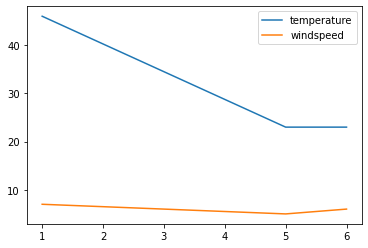

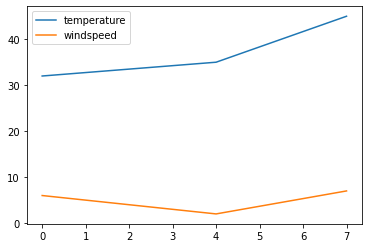

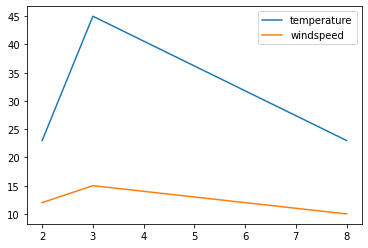

In [138]:
grouped.plot()

In [139]:
# group by function
df['Country'].value_counts()

United States                       20949
India                                9061
Germany                              5866
United Kingdom                       5737
Canada                               3395
                                    ...  
Saint Vincent and the Grenadines        1
Brunei Darussalam                       1
Sao Tome and Principe                   1
Timor-Leste                             1
Tonga                                   1
Name: Country, Length: 179, dtype: int64

In [141]:
country_grp = df.groupby(['Country']) #pandas.core.groupby.generic.DataFrameGroupBy
country_grp

### qcut and cut - This is used to convert a contineous data to categorical data
1. pd.cut(): cut command creates __equispaced bins__ but __frequency__ of samples is __unequal__ in each bin
2. pd.qcut(): qcut command creates __unequal size bins__ but __frequency__ of samples is __equal__ in each bin.

In [142]:
num = np.array([24,  7,  2, 25, 22, 29]) # add a duplicate and see teh result in qcut, it may throw a error
numbers = pd.DataFrame(num, columns=['num'])
numbers

,num
0,24
1,7
2,2
3,25
4,22
5,29


In [143]:
res = pd.cut(numbers['num'], 3)
# res.describe()
print(res.value_counts()) #Bins size has equal interval of 9    

(20.0, 29.0]     4
(1.973, 11.0]    2
(11.0, 20.0]     0
Name: num, dtype: int64


In [144]:
# qcut may sometime not have equal counts if the data contains repeated numbers
res1 = pd.qcut(numbers['num'], 3)
print(res1.value_counts())  #Equal frequecy of 2 in each bins

(24.333, 29.0]    2
(17.0, 24.333]    2
(1.999, 17.0]     2
Name: num, dtype: int64


In [145]:
# see how this categorical datas adds to the column
numbers['cut'] = res
numbers['qcut'] = res1
numbers

,num,cut,qcut
0,24,"(20.0, 29.0]","(17.0, 24.333]"
1,7,"(1.973, 11.0]","(1.999, 17.0]"
2,2,"(1.973, 11.0]","(1.999, 17.0]"
3,25,"(20.0, 29.0]","(24.333, 29.0]"
4,22,"(20.0, 29.0]","(17.0, 24.333]"
5,29,"(20.0, 29.0]","(24.333, 29.0]"


In [146]:
# Another way to check the categories in a series df
pd.Categorical(tnic_df['Pclass']) # This shows that 'Pclass' takes 3 unique values

[3, 1, 3, 1, 3, ..., 2, 1, 3, 1, 3]
Length: 891
Categories (3, int64): [1, 2, 3]

In [147]:
print(tnic_df['Pclass'].value_counts())
print('*'*45)
print(tnic_df['Pclass'].unique())

3    491
1    216
2    184
Name: Pclass, dtype: int64
*********************************************
[3 1 2]


### pivot vs crosstab
1. https://medium.com/@yangdustin5/quick-guide-to-pandas-pivot-table-crosstab-40798b33e367
1. https://pbpython.com/pandas-crosstab.html
2. Both create tables and compare features/columns of data. 
3. Pivot Table : expects your input to be a DF. You pass a DataFrame to pivot_table and specify the index/columns/values by passing the column names as strings. With cross_tab, you don't necessarily need to have a DataFrame going in, as you just pass array-like objects for index/columns/values.
2. Contingency Table or CrossTab - in Statistics, this is a type of table in matrix format that displays the frequency distribution(multivariate) of the variables. - https://en.wikipedia.org/wiki/Contingency_table
 

In [148]:
# this will give you a table to analyse Survival count on Pclass
# this might not be the ideal example for crosstab
# See Titanic notebook for 'pd.crosstab(train['Title'], train['Sex'])'
pd.crosstab(tnic_df['Pclass'], tnic_df['Survived'], margins=True)


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [149]:
#Error:  Index contains duplicate entries, cannot reshape
# tnic_df.pivot(index='Pclass', columns='Survived')

In [150]:
# See that groupby can also give similar results
# but crosstab gives back a dataframe with much better representation and more information
tnic_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [151]:
# pivot does not allow duplicates in index , TBD
# tnic_df.pivot(index='Pclass', columns='Survived')

### Iterating through the group

In [152]:
country_grp.get_group('India').shape # (9061, 84)
country_grp.get_group('India').head(1)

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
22013,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,India,No,"Professional degree (JD, MD, etc.)","A natural science (ex. biology, chemistry, phy...",Taken an online course in programming or softw...,2-9 employees,Academic researcher;Data scientist or machine ...,3,26,3,Very satisfied,Very satisfied,NaN,NaN,NaN,I am not interested in new job opportunities,3-4 years ago,"Write code by hand (e.g., on a whiteboard);Com...",No,Financial performance or funding status of the...,"Something else changed (education, award, medi...",USD,United States dollar,1500000.0,Weekly,2000000.0,50.0,There's no schedule or spec; I work on what se...,Inadequate access to necessary tools;Meetings;...,All or almost all the time (I'm full-time remote),Home,A little below average,"Yes, because I see value in code review",10.0,"Yes, it's part of our process",Developers typically have the most influence o...,I have a great deal of influence,Assembly;Bash/Shell/PowerShell;C;C++;Java;Java...,Python;Swift,Cassandra;Microsoft SQL Server;Oracle,Cassandra,Android;Arduino;Google Cloud Platform;IBM Clou...,IBM Cloud or Watson;Windows,jQuery,NaN,TensorFlow,TensorFlow,Visual Studio;Visual Studio Code,Windows,Development,Implementing our own cryptocurrency,Useful across many domains and could change ma...,Yes,Yes,No,YouTube,Online,Screen Name,NaN,A few times per week,Find answers to specific questions,1-2 times per week,Stack Overflow was much faster,60+ minutes,Yes,I have never participated in Q&A on Stack Over...,Yes,Yes,"Yes, definitely",A lot more welcome now than last year,Tech articles written by other developers;Indu...,NaN,Man,No,Straight / Heterosexual,NaN,Yes,Too long,Easy


In [153]:
country_grp['SocialMedia'].value_counts().head(50) # this is returning a series which has multiple indexes.
# print(country_grp['SocialMedia'].value_counts()) # Entire world social media stats grouped by country
country_grp['SocialMedia'].value_counts().loc['India'] # Social media stats of India
# print(df['SocialMedia'].value_counts()) # Entire world social media stats1

SocialMedia
WhatsApp                    2990
YouTube                     1820
LinkedIn                     955
Facebook                     841
Instagram                    822
Twitter                      542
Reddit                       473
I don't use social media     250
Snapchat                      23
Hello                          5
WeChat 微信                      5
VK ВКонта́кте                  4
Youku Tudou 优酷                 2
Weibo 新浪微博                     1
Name: SocialMedia, dtype: int64

In [154]:
country_grp['ConvertedComp'].median().sort_values(ascending=False).head(10)

Country
Liechtenstein                       811188.0
San Marino                          301788.0
Timor-Leste                         229500.0
Andorra                             160931.0
Democratic Republic of the Congo    110484.0
United States                       110000.0
Switzerland                          95440.0
Israel                               90720.0
Ireland                              83640.0
Denmark                              82860.0
Name: ConvertedComp, dtype: float64

In [155]:
# if we want to use multiple aggregate functions on the grouped data use agg
country_grp['ConvertedComp'].agg(['median', 'mean']).sort_index().head(5)

,median,mean
Country,,
Afghanistan,6222.0,101953.333333
Albania,10818.0,21833.700000
Algeria,7878.0,34924.047619
Andorra,160931.0,160931.000000
Angola,7764.0,7764.000000


In [156]:
df.head(5)

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
63129,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Afghanistan,"Yes, full-time",I never completed any formal education,NaN,Taken an online course in programming or softw...,"Just me - I am a freelancer, sole proprietor, ...",NaN,Less than 1 year,Younger than 5 years,1,Very dissatisfied,Very dissatisfied,Very confident,Yes,Yes,I am actively looking for a job,I've never had a job,Write any code,Yes,How widely used or impactful my work output wo...,I had a negative experience or interaction at ...,AED,United Arab Emirates dirham,648838511.0,Monthly,1000000.0,168.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work,It's complicated,"Other place, such as a coworking space or cafe",Far below average,No,NaN,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;Other(s):,Bash/Shell/PowerShell;TypeScript,MySQL,MySQL,Android;iOS;Windows;WordPress;Other(s):,Android;iOS;Windows;WordPress;Other(s):,Angular/Angular.js;Express;jQuery;Laravel;Othe...,Angular/Angular.js;Express;jQuery;Laravel;Othe...,Ansible;Apache Spark;Torch/PyTorch,Apache Spark;Torch/PyTorch,Android Studio;Atom;Coda;Eclipse;Emacs;IPython...,Windows,"Outside of work, for personal projects",Accepting Bitcoin or other coins and tokens as...,Useful across many domains and could change ma...,Yes,Yes,Yes,I don't use social media,Online,UserID,NaN,I have never visited Stack Overflow (before to...,Find answers to specific questions,Less than once per week,Stack Overflow was much faster,0-10 minutes,NaN,NaN,"No, I didn't know that Stack Overflow had a jo...",NaN,"No, not at all",NaN,Tech articles written by other developers,NaN,NaN,NaN,NaN,NaN,Yes,Too short,Easy
50499,"I am not primarily a developer, but I write co...",Yes,Less than once per year,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Afghanistan,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A health science (ex. nursing, pharmacy, radio...",Participated in a full-time developer training...,"10,000 or more employees",Data or business analyst;Database administrato...,7,27,7,Very dissatisfied,Very dissatisfied,Somewhat confident,Yes,Yes,"I’m not actively looking, but I am open to new...",More than 4 years ago,"Write code by hand (e.g., on a whiteboard);Int...",No,Opportunities for professional development;Div...,"Something else changed (education, award, medi...",AFN,Afghan afghani,960000.0,Monthly,153216.0,40.0,There is a schedule and/or spec (made by me or...,Lack of support from management;Time spent com...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",8.0,"Yes, it's not part of our process but the deve...",Developers typically have the most influence o...,I have a great deal of influence,C#;HTML/CSS;JavaScript;SQL;VBA,C#;HTML/CSS;JavaScript;R;SQL;TypeScript;VBA,Microsoft SQL Server;PostgreSQL;SQLit

In [157]:
# How many people from a perticular country knew Python
# this is by filtering way
fltr = (df['Country'] == 'India')
df.loc[fltr]['LanguageWorkedWith'].str.contains('Python').value_counts() #.sum() at last gives 3105

False    5739
True     3105
Name: LanguageWorkedWith, dtype: int64

In [158]:
# using groupby way
# this below code gives error as groupby object does not have .str method
# country_grp['LanguageWorkedWith'].str.contains('Python').value_counts()
country_grp['LanguageWorkedWith'].apply(lambda x: x.str.contains('Python').value_counts())

Country           
Afghanistan  False    31
             True      8
Albania      False    60
             True     23
Algeria      False    86
                      ..
Yemen        True      3
Zambia       False     8
             True      4
Zimbabwe     False    25
             True     14
Name: LanguageWorkedWith, Length: 335, dtype: int64

## Cleaning Data, Casting Datatypes and Handling Missing values
1. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
2. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna

In [159]:
people = {
    'first': ['Corey', 'Jane', 'John', 'Chris', np.nan, None, 'NA'], 
    'last': ['Schafer', 'Doe', 'Doe', 'Schafer', np.nan, np.nan, 'Missing'], 
    'email': ['CoreyMSchafer@gmail.com', 'JaneDoe@email.com', 'JohnDoe@email.com', None, np.nan, 'Anonymous@email.com', 'NA'],
    'age': ['33', '55', '63', '36', None, None, 'Missing']
}
df1 = pd.DataFrame(people)
df1

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
4,NaN,NaN,NaN,None
5,None,NaN,Anonymous@email.com,None
6,NA,Missing,NA,Missing


In [160]:
# check to see if any of the columns contain Nan/Missing values
df1.isnull().any() # any(axis='columns') to check row wise

first    True
last     True
email    True
age      True
dtype: bool

In [161]:
# This will give you the count of NaN in each column
df1.isnull().sum()
# df1.isnull().sum().sum() # count of NaN's in entire df

first    2
last     2
email    2
age      2
dtype: int64

In [162]:
pd.isnull(df1.loc[1, 'email'])

False

In [163]:
# to see the index numbers with NaN in email
# and create a email with first and last name
ind = df1[df1['email'].isnull()].index
for i in ind:
    print(i)
    if not (pd.isnull(df1.loc[i, 'first']) & pd.isnull(df1.loc[i, 'last'])):
        print(df1.loc[i, 'first'] + "." + df1.loc[i, 'last'] + "@email.com") # assign it to df1.loc[i. 'email'] = 

3
Chris.Schafer@email.com
4


In [164]:
# drops all rows which has NaN/None
df1.dropna() # axis='columns' drops columns

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
6,NA,Missing,NA,Missing


In [165]:
# keep rows with atleast threshold=n non-NaN values
df1.dropna(thresh=2)

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
6,NA,Missing,NA,Missing


In [166]:
# Define in which columns to look for missing values. See last 'NA' is not dropped as NA is not 'NaN'
df1.dropna(subset=['email'])  # so we want to drop the rowa which does not have valid email

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
5,None,NaN,Anonymous@email.com,None
6,NA,Missing,NA,Missing


In [167]:
df1.isna() # so this function tells you which values will be treated as NaN's.

,first,last,email,age
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,True,False
4,True,True,True,True
5,True,True,False,True
6,False,False,False,False


In [168]:
# to get some bad data from df's, say find out if any value is a non-interger or non-float age
# this may not work now as age column i of type string now
df1['age'].apply(lambda x: isinstance(x, (int, float)))

0    False
1    False
2    False
3    False
4    False
5    False
6    False
Name: age, dtype: bool

In [169]:
# to quickly see if a column has some bad data we can use this
df1['age'].unique # or
df1['age'].value_counts() # so missing is bad data

36         1
33         1
63         1
55         1
Missing    1
Name: age, dtype: int64

In [170]:
# to handle custome missing values replace them
df1.replace('NA', np.nan, inplace=True)
df1.replace('Missing', np.nan, inplace=True)
df1

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
4,NaN,NaN,NaN,None
5,None,NaN,Anonymous@email.com,None
6,NaN,NaN,NaN,NaN


In [171]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna
# Uncomment one at a time to see the effect
df1.fillna('MISSING') # This will fill all NaN's with 'MISSING'
# df1.fillna(0) #This will fill all NaN's with 0
# df1.fillna(value = {'first':'FIRST', 'last':'LAST', 'email':'MissingEmail', 'age':0}) # per column custom values
# df1.fillna(method='bfill') # fill with last valid observation - forward fill
# df1.fillna(method='ffill') # fill with last valid observation from top-down - backward fill
# df1['age'].fillna(method='ffill') # for series or single row.

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,MISSING,36
4,MISSING,MISSING,MISSING,MISSING
5,MISSING,MISSING,Anonymous@email.com,MISSING
6,MISSING,MISSING,MISSING,MISSING


In [172]:
df1.dtypes # see all columns are objects, also see that age is object(string) here

first    object
last     object
email    object
age      object
dtype: object

In [173]:
# converting to astype(int) is going to give us some error as we have some NaN's in the column and NaN's are of type 'float'
# this would just work fine if column had non NaN's
# df1['age'] = df1['age'].astype(int) 
df1['age'] = df1['age'].astype(float)
df1.dtypes
df1

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33.0
1,Jane,Doe,JaneDoe@email.com,55.0
2,John,Doe,JohnDoe@email.com,63.0
3,Chris,Schafer,None,36.0
4,NaN,NaN,NaN,NaN
5,None,NaN,Anonymous@email.com,NaN
6,NaN,NaN,NaN,NaN


In [174]:
# to calculate the average years of coding experience of the respondents
# df['YearsCode'].astype(float) # this still gives a error because this column has some strings
df['YearsCode'].unique() # gives all teh unique values

array(['Less than 1 year', '7', '2', '6', '3', '4', '10', '36', '1', nan,
       'More than 50 years', '20', '9', '5', '8', '31', '28', '15', '13',
       '12', '17', '18', '21', '35', '14', '25', '11', '19', '22', '23',
       '40', '39', '30', '43', '27', '33', '29', '24', '34', '16', '32',
       '26', '38', '44', '41', '45', '37', '47', '42', '46', '48', '50',
       '49'], dtype=object)

In [175]:
df['YearsCode'].replace('Less than 1 year', 0, inplace=True)
df['YearsCode'].replace('More than 50 years', 51, inplace=True)

In [176]:
df['YearsCode'] = df['YearsCode'].astype(float)
df['YearsCode'].mean()

11.662114216834588

### Dates and TimeSeries 
1. https://www.youtube.com/watch?v=eirjjyP2qcQ - For basic of datetime
1. https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
2. https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

### TimeZone
1. https://en.wikipedia.org/wiki/Time_zone 
2. To standardise the Time between different location on earth, we have choosen UTC(Coordinated Universal Time) which is nothing but the Greenwhich Mean Time(GMT). And we refer to any time in any location(country) as +/- of this UTC time.
3. According to 'https://docs.python.org/3/library/datetime.html' Date and time objects may be categorized as “aware” or “naive.” "aware" time object considers all the time adjustments and time zone related info and hence is useful if you are working with time sensitive data with more than two timezone. Whereas a "naive" object does not contain enough information to unambiguously locate itself relative to other date/time objects. Whether a naive object represents Coordinated Universal Time (UTC), local time, or time in some other timezone is purely up to the program,

In [177]:
# this is a Ethereum based cryptocurrency data broken down into 1Hr
df_Eth = pd.read_csv('data/date_timeseries.csv')
print(df_Eth.head(2))
print(df_Eth.info())
print('-'*25)
# read and format the dates from str to datetime as you read the csv file
# and to this read_csv we cannot just pass a datetime format string, we will have to pass a function
# d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p')# here we are passing individual time str to lambda 'x'
# df_Eth = pd.read_csv('data/date_timeseries.csv', parse_dates=['Date'], date_parser=d_parser)
# we will show how to do it seperateely this conversion in below lines of code
df_Eth.head(2)

               Date  Symbol    Open    High     Low   Close      Volume
0  2020-03-13 08-PM  ETHUSD  129.94  131.82  126.87  128.71  1940673.93
1  2020-03-13 07-PM  ETHUSD  119.51  132.02  117.10  129.94  7579741.09
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    23674 non-null  object 
 1   Symbol  23674 non-null  object 
 2   Open    23674 non-null  float64
 3   High    23674 non-null  float64
 4   Low     23674 non-null  float64
 5   Close   23674 non-null  float64
 6   Volume  23674 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.1+ MB
None
-------------------------


,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09


In [178]:
# see that the date column in in str format and not in a Datetime format
df_Eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    23674 non-null  object 
 1   Symbol  23674 non-null  object 
 2   Open    23674 non-null  float64
 3   High    23674 non-null  float64
 4   Low     23674 non-null  float64
 5   Close   23674 non-null  float64
 6   Volume  23674 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.1+ MB


In [179]:
# df_Eth['Date'] = pd.to_datetime(df_Eth['Date']) # this will not work in this case as datetime is not able to understand the format
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes
# find the format code in the link

In [180]:
df_Eth['Date'] = pd.to_datetime(df_Eth['Date'], format='%Y-%m-%d %I-%p') 
print(df_Eth.info()) # see the change in Date object.
df_Eth.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    23674 non-null  datetime64[ns]
 1   Symbol  23674 non-null  object        
 2   Open    23674 non-null  float64       
 3   High    23674 non-null  float64       
 4   Low     23674 non-null  float64       
 5   Close   23674 non-null  float64       
 6   Volume  23674 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 1.2+ MB
None


,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09


In [181]:
df_Eth.loc[0, 'Date'].day_name() # since now its a datetime object lets use a method on it.

'Friday'

In [182]:
# now if you want to use the method on the entire series use dt.
# so 'dt' is a class which can apply datetime methods on a entire series.
df_Eth['Date'].dt.day_name().head(5)

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: Date, dtype: object

In [183]:
print(df_Eth['Date'].min())
print(df_Eth['Date'].max())
df_Eth['Date'].max() - df_Eth['Date'].min()

2017-07-01 11:00:00
2020-03-13 20:00:00


Timedelta('986 days 09:00:00')

In [184]:
# filter some years
filt = (df_Eth['Date'] >= pd.to_datetime('2019-01-01')) & (df_Eth['Date'] < pd.to_datetime('2020-01-01'))
df_Eth.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84
...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99


In [185]:
# if we set our index to Date then it becomes very easy to work with it and also 
# since each row is identified by a unique date its a perfect candidate for index
df_Eth.set_index('Date', inplace=True)


In [186]:
df_Eth.index

DatetimeIndex(['2020-03-13 20:00:00', '2020-03-13 19:00:00',
               '2020-03-13 18:00:00', '2020-03-13 17:00:00',
               '2020-03-13 16:00:00', '2020-03-13 15:00:00',
               '2020-03-13 14:00:00', '2020-03-13 13:00:00',
               '2020-03-13 12:00:00', '2020-03-13 11:00:00',
               ...
               '2017-07-01 20:00:00', '2017-07-01 19:00:00',
               '2017-07-01 18:00:00', '2017-07-01 17:00:00',
               '2017-07-01 16:00:00', '2017-07-01 15:00:00',
               '2017-07-01 14:00:00', '2017-07-01 13:00:00',
               '2017-07-01 12:00:00', '2017-07-01 11:00:00'],
              dtype='datetime64[ns]', name='Date', length=23674, freq=None)

In [187]:
df_Eth.loc['2019']

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84
...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43


In [188]:
# also we can use slicing 
df_Eth.loc['2020-01':'2020-02']['Close'].mean() # just Jan and Feb 2020 data closing mean value

195.1655902777778

In [189]:
# the data for 'Close' value is on hourly bases. Whatif you want to see it on a daily basis
df_Eth.loc['2020-01-01']['High'].head(24) # highest value of stock each hour for 24 hours
df_Eth.loc['2020-01-01']['High'].max()

132.68

In [190]:
# This date_range function will return a fixed frequency DatetimeIndex.
dates = pd.date_range('1/1/2020', periods=7)
print(dates)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')


In [191]:
df_Eth.head(3)

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


### ReSampling - https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling
1. Pandas has a simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data)

In [192]:
# if we want to resample the data to see the high value by day and not by hour
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
# 'D' one day, '2D' two days, 'W' weeks
print(df_Eth.loc['2017-07-01']['High'])
print('-'*25)
resamp = df_Eth['High'].resample('D') # gives a pandas.core.resample.DatetimeIndexResampler object
highs = df_Eth['High'].resample('D').max() # this will resample the date and grabs the max value in that day.
lows = df_Eth['High'].resample('D').min() # this will resample the date and grabs the min value in that day.
print(highs.head(3))
print(lows.head(3))

Date
2017-07-01 23:00:00    264.97
2017-07-01 22:00:00    264.36
2017-07-01 21:00:00    260.56
2017-07-01 20:00:00    262.00
2017-07-01 19:00:00    260.88
2017-07-01 18:00:00    266.73
2017-07-01 17:00:00    268.44
2017-07-01 16:00:00    272.57
2017-07-01 15:00:00    272.74
2017-07-01 14:00:00    269.90
2017-07-01 13:00:00    274.93
2017-07-01 12:00:00    275.01
2017-07-01 11:00:00    279.99
Name: High, dtype: float64
-------------------------
Date
2017-07-01    279.99
2017-07-02    293.73
2017-07-03    285.00
Freq: D, Name: High, dtype: float64
Date
2017-07-01    260.56
2017-07-02    257.92
2017-07-03    276.23
Freq: D, Name: High, dtype: float64


In [193]:
highs['2020-01-01'] # same value as 2 cells above

132.68

<AxesSubplot:xlabel='Date'>

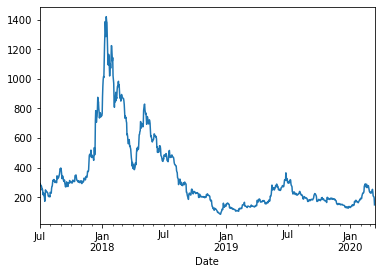

In [194]:
highs.plot()

In [195]:
# we can resample the whole dataframe to give us the data only that we are interested
df_Eth.resample('W').mean() # this gives mean value of all the columns taken over week frame.

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-02,268.066486,271.124595,264.819730,268.202162,2.185035e+06
2017-07-09,261.337024,262.872917,259.186190,261.062083,1.337349e+06
2017-07-16,196.193214,199.204405,192.722321,195.698393,2.986756e+06
2017-07-23,212.351429,215.779286,209.126310,212.783750,4.298593e+06
2017-07-30,203.496190,205.110357,201.714048,203.309524,1.581729e+06
...,...,...,...,...,...
2020-02-16,255.021667,257.255238,252.679762,255.198452,2.329087e+06
2020-02-23,265.220833,267.263690,262.948512,265.321905,1.826094e+06
2020-03-01,236.720536,238.697500,234.208750,236.373988,2.198762e+06


In [196]:
# what if we want to get max(), mean() and min() for different columns
df_Eth.resample('W').agg({'Close': 'mean', 'High':'max', 'Low':'min', 'Volume':'sum'}) # see that 'Open' is not displayed

,Close,High,Low,Volume
Date,,,,
2017-07-02,268.202162,293.73,253.23,8.084631e+07
2017-07-09,261.062083,285.00,231.25,2.246746e+08
2017-07-16,195.698393,240.33,130.26,5.017750e+08
2017-07-23,212.783750,249.40,153.25,7.221637e+08
2017-07-30,203.309524,229.99,178.03,2.657305e+08
...,...,...,...,...
2020-02-16,255.198452,290.00,216.31,3.912867e+08
2020-02-23,265.321905,287.13,242.36,3.067838e+08
2020-03-01,236.373988,278.13,209.26,3.693920e+08


### Multi Index DataFrame:

In [197]:
out_index = ['G1','G1','G1','G2','G2','G2']
in_index = [1,2,3,1,2,3]
df3 = pd.DataFrame(data=np.random.rand(6,3), index=[out_index, in_index], columns=list('ABC'))
df3

A         B         C
G1 1  0.024791  0.144225  0.813587
   2  0.581539  0.228328  0.686900
   3  0.230170  0.380546  0.480328
G2 1  0.037176  0.041570  0.803621
   2  0.743965  0.214649  0.942623
   3  0.660063  0.606198  0.308208

### Working with JSON data:
1. https://realpython.com/python-json/
2. JSON is a syntax for storing and exchanging data. JSON is text( basically a string), written with JavaScript object notation.
3. Python has a built-in package called json, which can be used to work with JSON data.
4. Parse JSON - Convert JSON string to Python object using : json.loads() this returns a python dictionary.
5. Convert Python objects to JSON string use json.dumps().
6. Use pd.read_json('filename.json') to a DataFrame object. Here json.read can handle only simpel json structure not the nested ones. 

In [198]:
# Raw string data in JSON format
json_data = """{
    "name": "Wes",
    "places_lived": ["United States", "Spain", "Germany"],
    "pet": null,
    "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
                 {"name": "Katie", "age": 38, "pets": ["Sixes", "Stache", "Cisco"]}]
}"""
type(json_data)

str

In [199]:
import json
# json.loads takes str and returns python dict
py_data = json.loads(json_data)
print(type(py_data))
py_data

<class 'dict'>


{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [200]:
json_data = json.dumps(py_data)
print(type(json_data))
json_data

<class 'str'>


'{"name": "Wes", "places_lived": ["United States", "Spain", "Germany"], "pet": null, "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]}, {"name": "Katie", "age": 38, "pets": ["Sixes", "Stache", "Cisco"]}]}'

In [201]:
data = pd.read_json('data/example.json')
print(type(data))
data

<class 'pandas.core.frame.DataFrame'>


,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [202]:
# convert back the Dataframe to json
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_json.html
json_data = data.to_json() # data.to_json(orient='records') you can specify how you want the JSON format be 
json_data1 = data.to_json(orient='records')
print(type(json_data)) 
print(json_data)
print('{}'.format('*'*45))
print(json_data1)

<class 'str'>
{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}
*********************************************
[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]


### Pickle and Joblib - https://www.youtube.com/watch?v=KfnhNlD8WZI
1. Pickling: It is a process where a Python object hierarchy is converted into a byte stream and dumps it into a file by using dump function.This character stream contains all the information necessary to reconstruct the object in another python script.
2. Pickle files are basically binary files stored on disk. Basically when we from a model and train it with huge data size data, we should save the trained model so that we can directly use it next time without having to retrian it. Thats where pickle format and pickling comes in picture.
3. Similar to pickle we have scikit learn joblib : https://scikit-learn.org/stable/modules/model_persistence.html

In [203]:
import pickle
# sample usage
# with open('sample_file', 'wb') as f:
#     pickle.dump(model, f)  # assuming that model = linearRegression model or some other model
# with open('sample_file', 'rb') as f:
#     mod = pickle.load(f)

### Hadoop Distributed File System HDFS(.h5) file handling:
1. This is another kind of binary format used in Hadoop framework.

In [204]:
df= pd.DataFrame({'a': np.random.randn(100)})
df.head(5)

,a
0,-0.680387
1,-0.135457
2,0.160876
3,-1.151374
4,-1.257851


In [205]:

# This creates a empty h5 file system.

# # "write"
# with pd.HDFStore('data/mydata_hdfs.h5',  mode='w') as store:
#     store.append('df', df, data_columns= df.columns, format='table')
    
# # "read"
# with pd.HDFStore('data/mydata_hdfs.h5',  mode='r') as newstore:
#     df_restored = newstore.select('df')
# df_restored

In [206]:
# with pd.HDFStore('data/mydata_hdfs.h5',  mode='w') as store:
#     store.put('obj2', df, format='table')
#     store.select('obj2', where=['index >= 10 and index <= 15'])

In [207]:
# df.to_hdf('data/mydata.h5', 'obj3', format='table')
# pd.read_hdf('data/mydata.h5', 'obj3', where=['index < 5'])

### Web API's

In [208]:
# use read_html


# Numpy - https://numpy.org/devdocs/user/quickstart.html

1. Both __NumPy__ and __SciPy__ are Python libraries used for used mathematical and numerical analysis. NumPy contains array data and basic operations such as sorting, indexing, etc whereas, SciPy consists of all the numerical code and higher functionality like integration, optimization, Signal processing needed for scientific work.
2. NumPy is a basic library for mathematical or numerical calculation. Written in __C__. So much faster than other python library. Maximum library which was developed for data science statistics and in general for mathematical calculations, are developed on the top of NumPy. So is SciPy.
3. NumPy’s main object is the __homogeneous multidimensional array__. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of non-negative integers. In NumPy dimensions are called axes. Numpy’s array class is called as ndarray.
4. 

In [209]:
import numpy as np

In [210]:
# this is also a example of braadcasting
np0 = np.array(['bob', 1, 2]) # since np are homogeneous, all elements are converted into Numpy
print(np0, np0.dtype)
np1 = np.array([1, 2, 3.0])
print(np1, np1.dtype)

['bob' '1' '2'] <U3
[1. 2. 3.] float64


In [211]:
# convert dimentions
np.array([2,2], ndmin = 4)

array([[[[2, 2]]]])

In [212]:
 np.array([1, 2, 3], dtype=complex)

array([1.+0.j, 2.+0.j, 3.+0.j])

In [213]:
x = np.array([(1,2),(3,4)],dtype=[('a','<i2'),('b','<i8')])

print(x[0][0], type(x[0][0]))
print(x[0][1], type(x[0][1]))
print(x[1][0], type(x[1][0]))
print(x[1][1], type(x[1][1]))
x

1 <class 'numpy.int16'>
2 <class 'numpy.int64'>
3 <class 'numpy.int16'>
4 <class 'numpy.int64'>


array([(1, 2), (3, 4)], dtype=[('a', '<i2'), ('b', '<i8')])

In [214]:
# Creating array from subclasses:
# Matrix is different data type than ndarray, Matrix is a subset of array
a = np.mat(np.array([[1, 2],[4,7]]))
print(a, type(a))

[[1 2]
 [4 7]] <class 'numpy.matrix'>


In [215]:
np.mat('1 2; 3 4')

matrix([[1, 2],
        [3, 4]])

In [216]:
issubclass(np.matrix, np.ndarray)

True

In [217]:
np1 = np.array([[1,2], [3,4]])
print(np1)
print('*'*45)
np2 = np.array([[1,2], [3,4], [5,6]])
print(np2)
print('*'*45)
np3 = np.array([[[1,2], [3,4], [5,6]]])
print(np3)

[[1 2]
 [3 4]]
*********************************************
[[1 2]
 [3 4]
 [5 6]]
*********************************************
[[[1 2]
  [3 4]
  [5 6]]]


In [218]:
# shape - dimension of an array
# ndim - Depth of array or 1-D, 2-D, 3-D etc
print("shape - {}, dim - {}".format(np1.shape, np1.ndim))
print("shape - {}, dim - {}".format(np2.shape, np2.ndim))
print("shape - {}, dim - {}".format(np3.shape, np3.ndim)) # Number of [[[*]]] will tell you what dimention array it is

shape - (2, 2), dim - 2
shape - (3, 2), dim - 2
shape - (1, 3, 2), dim - 3


In [219]:
print(np1[1,1])
print(np1[1])

4
[3 4]


In [220]:
print(np3[0])
print('-'*25)
print(np3[0, 0])
print('-'*25)
print(np3[0, 1])
print('-'*25)
print(np3[0, 0, 0])
print('-'*25)
print(np3[0, 2, 1])

[[1 2]
 [3 4]
 [5 6]]
-------------------------
[1 2]
-------------------------
[3 4]
-------------------------
1
-------------------------
6


In [221]:
# Convert the input to an array.
a = [1, 2]
b = np.asarray(a)
print(b,type(b)) # asarray() or array() both are same
print(a, type(a)) # parent variable is not modified

[1 2] <class 'numpy.ndarray'>
[1, 2] <class 'list'>


In [222]:
c = np.array(b, copy=True) # this creats a copy
c is b

False

In [223]:
# creating copyies exaplined
x = np.array([1,2,3])
print(x)
y=x
y is x

[1 2 3]


True

In [224]:
z = np.copy(x)
z is x

False

#### Numpy gives lots of function to create ndarrays
['array',
 ' zeros',
 ' zeros_like',
 ' ones',
 ' ones_like',
 ' empty',
 ' empty_like',
 ' arange',
 ' linspace',
 ' numpy.random.RandomState.rand',
 ' numpy.random.RandomState.randn',
 ' fromfunction',
 ' fromfile']

In [225]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [226]:
#  NumPy provides the arange function which is analogous to the Python built-in range, but returns an array.
np.arange( 10, 30, 5 )

array([10, 15, 20, 25])

In [227]:
print(np.arange(6))
print(np.arange(6).reshape(2,3))

[0 1 2 3 4 5]
[[0 1 2]
 [3 4 5]]


In [228]:
np.arange( 0, 2, 0.3 )

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

In [229]:
np.eye(4,4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [230]:
# When arange is used with floating point arguments,it is generally not possible to predict the number of elements obtained,
# due to the finite floating point precision. For this reason, it is usually better to use the function 
# linspace that receives as an argument the number of elements that we want, instead of the step:
np.linspace( 0, 2, 9 )

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [231]:
np.fromfunction((lambda i, j: i * j), (3, 3), dtype=int)

array([[0, 0, 0],
       [0, 1, 2],
       [0, 2, 4]])

In [232]:
iterable = (x*x for x in range(5))
print(iterable)
np.fromiter(iterable, float)

<generator object <genexpr> at 0x154B9418>


array([ 0.,  1.,  4.,  9., 16.])

In [233]:
np.fromstring('1 2 3 4',sep=' ')

array([1., 2., 3., 4.])

#### Basic Arithmetic Operations : Arithmetic operators on arrays apply elementwise. A new array is created and filled with the result.

In [234]:
a = np.arange(5)
b = np.arange(5,10)
print(a)
print(b)

[0 1 2 3 4]
[5 6 7 8 9]


In [235]:
print(a*3)
print(a+b)
print(a<3)

[ 0  3  6  9 12]
[ 5  7  9 11 13]
[ True  True  True False False]


In [236]:
# Some operations, such as += and *=, act in place to modify an existing array rather than create a new one.
b+=a
b

array([ 5,  7,  9, 11, 13])

In [237]:
A = np.array( [[1,2], [3,4]] )
B = np.array( [[5,6], [7,8]] )
print(A, '\n')
print(B)

[[1 2]
 [3 4]] 

[[5 6]
 [7 8]]


In [238]:
# elementwise product
A*B

array([[ 5, 12],
       [21, 32]])

In [239]:
# matrix prodduct
A@B

array([[19, 22],
       [43, 50]])

In [240]:
# dot product
A.dot(B)

array([[19, 22],
       [43, 50]])

### Broadcasting:
1. https://docs.scipy.org/doc/numpy-1.10.1/user/basics.broadcasting.html
2. https://numpy.org/devdocs/user/basics.broadcasting.html
2. The term broadcasting describes how numpy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes

### Indexing and Slicing:
1. When we slice a subarray, the subarray still refers to the original array. So changing the elements of subarray still refers to the original array. So changing the elements of subarray will change the original array. 
2. Indeing and slicing are pretty much similar to pandas

In [241]:
an_array = np.array([[11,12,13,14], [21,22,23,24], [31,32,33,34]])
print(an_array, '\n')
a_slice = an_array[:2, 1:3]  # this selects row 0,1 and col 1,2
a_slice

[[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]] 



array([[12, 13],
       [22, 23]])

In [242]:
an_array[2,:]

array([31, 32, 33, 34])

In [243]:
a_slice[1,1] = 55
an_array # changes the original array

array([[11, 12, 13, 14],
       [21, 22, 55, 24],
       [31, 32, 33, 34]])

In [244]:
# to make a copy while slicing use below, so the modifications are limited to the copy only.
slice = np.array(an_array[:2, 1:3])
print(slice, '\n')
slice[1,1] = 23 # this will not modify the parent copy.
print(an_array)

[[12 13]
 [22 55]] 

[[11 12 13 14]
 [21 22 55 24]
 [31 32 33 34]]


In [245]:
# You can access the multiple elements of an array by proving a list ndarray[[row list], [col list]]
# this will give you a one dimensional array of picked elements.
an_array[[2,2,1], [1,2,1]]
# You can manipulate them as well

array([32, 33, 22])

In [246]:
# We can use conditional slicing to access and manipulate relevant data in ndarrays based on our condition
an_array[an_array > 21]

array([22, 55, 24, 31, 32, 33, 34])

In [247]:
# What is particularly useful is that we can actually change elements in the array applying a similar logical filter. 
# Let's add 100 to all the even values.
an_array[an_array % 2 == 0] += 100
an_array

array([[ 11, 112,  13, 114],
       [ 21, 122,  55, 124],
       [ 31, 132,  33, 134]])

In [248]:
an_array #

array([[ 11, 112,  13, 114],
       [ 21, 122,  55, 124],
       [ 31, 132,  33, 134]])